In [0]:
import pandas as pd

In [0]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import sklearn.cluster

In [0]:
train = pd.read_csv("tcd ml 2019-20 income prediction training (with labels).csv") 
sub_test = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv")
submission = pd.read_csv("tcd ml 2019-20 income prediction submission file.csv")

In [5]:
train.head(10)

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217
5,6,1991.0,male,60.0,Liberia,56080,senior security analyst,Bachelor,0,Blond,181,125809.99030
6,7,1982.0,NaN,71.0,State of Palestine,1205185,program associate,Bachelor,0,Black,174,150319.42260
7,8,2008.0,male,36.0,Israel,31419,retail specialist,NaN,0,Brown,190,11849.02876
8,9,2015.0,male,43.0,South Sudan,85333,intergovernmental outreach coordinator,No,0,Blond,189,48058.20607
9,10,2019.0,female,16.0,Cuba,1325383,lease analyst,Bachelor,1,Black,157,90940.68912


In [6]:
train.dtypes

Instance               int64
Year of Record       float64
Gender                object
Age                  float64
Country               object
Size of City           int64
Profession            object
University Degree     object
Wears Glasses          int64
Hair Color            object
Body Height [cm]       int64
Income in EUR        float64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111993 entries, 0 to 111992
Data columns (total 12 columns):
Instance             111993 non-null int64
Year of Record       111552 non-null float64
Gender               104561 non-null object
Age                  111499 non-null float64
Country              111993 non-null object
Size of City         111993 non-null int64
Profession           111671 non-null object
University Degree    104623 non-null object
Wears Glasses        111993 non-null int64
Hair Color           104751 non-null object
Body Height [cm]     111993 non-null int64
Income in EUR        111993 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


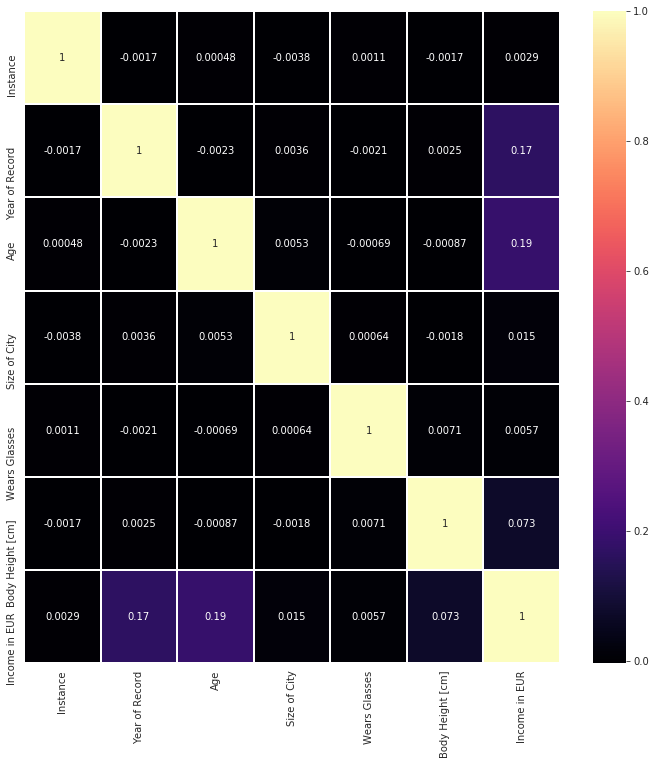

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='magma', linecolor='white', linewidths=1)
plt.show()

In [0]:
#weak correlation between Wear Glasses,Instance and Size of city and income so we can drop it
train = train.drop(["Instance","Hair Color","Wears Glasses"], axis=1)

In [0]:
#drop same features from test
sub_test = sub_test.drop(["Instance","Hair Color","Wears Glasses"], axis=1)

Data Cleaning

In [0]:
#drop null values
#second method try with filling null values
train = train.dropna()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96606 entries, 0 to 111992
Data columns (total 9 columns):
Year of Record       96606 non-null float64
Gender               96606 non-null object
Age                  96606 non-null float64
Country              96606 non-null object
Size of City         96606 non-null int64
Profession           96606 non-null object
University Degree    96606 non-null object
Body Height [cm]     96606 non-null int64
Income in EUR        96606 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 7.4+ MB


Outliers Handling

In [13]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

train=cap_data(train)

capping the  Year of Record
capping the  Gender


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


capping the  Age
capping the  Country
capping the  Size of City
capping the  Profession
capping the  University Degree
capping the  Body Height [cm]
capping the  Income in EUR


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [14]:
train[train['Income in EUR']<0]

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm],Income in EUR


In [15]:
train['University Degree'].value_counts()

Bachelor    39838
No          24923
Master      24905
PhD          6303
0             637
Name: University Degree, dtype: int64

In [16]:
train['University Degree'].value_counts()

Bachelor    39838
No          24923
Master      24905
PhD          6303
0             637
Name: University Degree, dtype: int64

In [17]:
train['Gender'].value_counts()

male       39529
female     25121
other      25010
unknown     6284
0            662
Name: Gender, dtype: int64

In [0]:
pd.set_option('display.max_rows', 1500)

In [19]:
train.columns

Index(['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
       'Profession', 'University Degree', 'Body Height [cm]', 'Income in EUR'],
      dtype='object')

In [20]:
train['Profession'].value_counts()

pipefitter                                                             230
procedural justice coordinator                                         229
preplacement nurse practitioner                                        215
port marine engineer                                                   214
pipelayer                                                              213
refuse and recyclable material collector                               211
production support                                                     210
program and policy specialist                                          210
police administrative aide                                             209
principal administrative associate                                     209
policeman                                                              208
photographer                                                           207
optical network engineer                                               206
peoplesoft developer     

In [21]:
train['Profession'][1]

'safe event coordinator'

In [0]:
titles = pd.Series(train['Profession'].unique())

In [0]:

titles = titles.apply(lambda x: x.lower())

EXploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f528981f668>,
      dtype=object)

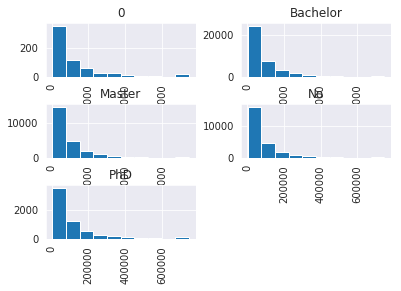

In [24]:
train.hist(column='Income in EUR', by=['University Degree'])

In [25]:
train[train['University Degree']=="No"]

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height [cm],Income in EUR
3,2006.0,other,33.0,Cuba,751903.00,fleet assistant,No,171,45993.757930
8,2015.0,male,43.0,South Sudan,85333.00,intergovernmental outreach coordinator,No,189,48058.206070
11,1989.0,other,15.0,Togo,1040420.00,security administrator,No,191,24136.544640
16,2018.0,other,27.0,Paraguay,274938.00,Aircraft Surface Finisher,No,174,52637.571190
17,2003.0,other,25.0,Belgium,51773.00,mobile device management architect,No,201,90184.966010
19,1995.0,female,63.0,Costa Rica,743454.00,postal service mail carrier,No,165,87347.302940
30,1983.0,male,14.0,Lebanon,1131786.00,senior bi developer,No,171,22619.438980
35,2010.0,male,62.0,South Sudan,59341.00,quality control senior engineer,No,219,175660.307700
40,2010.0,male,62.0,Belarus,841917.00,social science research assistant,No,157,53869.732270
45,1994.0,other,18.0,Greece,572670.00,program administrator,No,181,48252.331350


In [0]:
degree_encoding = {"Bachelor":0,"No":1,"Master":2,"PhD":3,"0":1}

In [0]:
train['University Degree'] = train['University Degree'].map(degree_encoding)

In [0]:
sub_test['University Degree'] = sub_test['University Degree'].map(degree_encoding)

In [0]:
country_encoding  = {}

In [0]:
country_code = 0
for country  in train['Country'].unique():
    country_encoding[country] = country_code
    country_code+=1

In [0]:
train['Country'] = train['Country'].map(country_encoding)
sub_test['Country'] = sub_test['Country'].map(country_encoding)

In [0]:
import random
sub_test = sub_test.fillna(random.randint(0,100000))

In [0]:
train['Year of Record'] = train['Year of Record'].astype(int)
train['Age'] = train['Age'].astype(int)
train['Income in EUR']  = train['Income in EUR'].astype(int)
sub_test['Year of Record'] = sub_test['Year of Record'].astype(int)
sub_test['Age'] = sub_test['Age'].astype(int)

In [35]:
train.Gender.value_counts()

male       39529
female     25121
other      25010
unknown     6284
0            662
Name: Gender, dtype: int64

In [0]:
gender_encoding = {'male':0,"female":1,"other":2,"unknown":3,"0":3}

In [0]:
train['Gender'] = train['Gender'].map(gender_encoding)
sub_test['Gender'] = sub_test['Gender'].map(gender_encoding)

Modeling

In [0]:
y_train = train['Income in EUR']
train.drop(['Income in EUR'], axis=1, inplace=True)

In [39]:
train.shape

(96606, 8)

In [40]:
y_train.shape

(96606,)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english', ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):
    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

In [0]:
vect = StemmedTfidfVectorizer(stemmer=stemmer, sublinear_tf=True)

#vect = TfidfVectorizer(stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')
x = vect.fit_transform(train['Profession'])
df1 = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())


In [58]:
df1.shape

(96606, 2450)

In [0]:
train_df = pd.concat([train.reset_index(drop=True), df1.reset_index(drop=True)], axis= 1)

In [71]:
train_df.shape

(96606, 911)

In [0]:
train_df.drop(['Profession'], axis=1, inplace=True)

In [0]:
#https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [74]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 670.71 MB
Memory usage after optimization is: 167.59 MB
Decreased by 75.0%


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_trainn, y_val = train_test_split(train_df, y_train, test_size=0.10, random_state=42)

In [50]:
y_val.shape

(9661,)

In [0]:
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.metrics import mean_squared_error

In [0]:
parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
                   'min_child_weight': [5],
        'gamma': [0.5],
        'subsample': [0.8],
        'colsample_bytree': [1.0],
        'max_depth': [11]}

In [0]:
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27,tree_method='gpu_hist')

In [0]:
for i,v in y_trainn.items():
  if v <0:
    y_trainn[i] = 0

In [0]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train_df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train_df.columns.values]


In [0]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]


In [56]:
!nvidia-smi

Tue Oct 15 19:43:55 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_trainn)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=6)]: Done   3 out of   3 | elapsed:  9.6min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=6,
                                    objective='reg:linear', random_sta...
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, tree_method='gpu_hist',
                                    verbosity=1),
             iid=False, n_jobs=6,
             param_grid={'colsample_bytree': [1.0], 'gamma': [0.5],
                         'max_depth': [11], 'min_child_wei

In [63]:
print (gsearch1.score)
print('best params')
print (gsearch1.error_score)
print('best score')
print (gsearch1.best_score_)

<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=6,
                                    objective='reg:linear', random_sta...
                                    scale_pos_weight=1, seed=27, silent=None,
                                    subsample=0.8, tree_method='gpu_hist',
                                    verbosity=1),
             iid=False, n_jobs=6,
             param_grid={'colsample_bytree': [1.0], 'gamma': [0.5],
                      

In [64]:
gsearch1.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 11,
 'min_child_weight': 5,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [0]:
sub_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in sub_test.columns.values]


In [66]:
sub_test.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Body Height _cm_,Income
0,1992,2.0,21,64.0,391652,senior project analyst,2.0,153,-1.0
1,1986,2.0,34,7.0,33653,greeter,0.0,163,-1.0
2,1994,3.0,53,19.0,34765,liaison,0.0,153,-1.0
3,1984,3.0,29,66.0,1494132,occupational therapist,1.0,154,-1.0
4,2007,2.0,17,57.0,120661,portfolio manager,1.0,191,-1.0


In [0]:
gsearch1.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 11,
 'min_child_weight': 5,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [0]:
def test_feature(sub_test):
  y = vect.transform(sub_test['Profession'])
  sub_test['Profession'] = sub_test['Profession'].astype(str)
  df2 = pd.DataFrame(y.toarray(), columns=vect.get_feature_names())
  test_df = pd.concat([sub_test.reset_index(drop=True), df2.reset_index(drop=True)], axis= 1)
  test_df.drop(['Profession','Income'],inplace=True,axis=1)
  test_df['Country'] = sub_test['Country'].astype(int)
  return test_df

In [0]:
sub_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in sub_test.columns.values]

In [0]:
val_pred_xgb = gsearch1.predict(X_val)

In [0]:
y = vect.transform(sub_test['Profession'])

In [0]:
sub_test['Profession'] = sub_test['Profession'].astype(str)
    

In [0]:
df2 = pd.DataFrame(y.toarray(), columns=vect.get_feature_names())

In [0]:
test_df = pd.concat([sub_test.reset_index(drop=True), df2.reset_index(drop=True)], axis= 1)

In [0]:
test_df.drop(['Profession','Income'],inplace=True,axis=1)

In [0]:
test_df['Country'] = sub_test['Country'].astype(int)

In [0]:
xgboost_sub_pred = gsearch1.predict(test_df)
model_lgb_sub_pred = model_lgb.predict(test_df)

In [0]:
ensembled_prediction = (0.50*xgboost_sub_pred+0.50*model_lgb_sub_pred)

In [0]:
for i in range (len(ensembled_prediction)):
  if ensembled_prediction[i]<0:
    ensembled_prediction[i] = 0

In [0]:
submission["Income"] = ensembled_prediction

In [0]:
submission.to_csv("submission.csv")

Model Ensembling

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_trainn, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=35, n_estimators=1500)


In [65]:
gboost_model = GBoost.fit(X_train,y_trainn)

NameError: ignored

In [81]:
model_lgb.fit(X_train,y_trainn)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1500, n_jobs=-1, num_leaves=35,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [0]:
#xgboost_pred = gsearch1.predict(X_val)
model_lgb_pred = model_lgb.predict(X_val)

In [0]:
gboost_model_pred = gboost_model.predict(X_val)

In [83]:
from math import sqrt
LGB_model_error = sqrt(mean_squared_error(y_val, model_lgb_pred))
print(f'LGBM Mean Squared Error - {LGB_model_error}')

LGBM Mean Squared Error - 52235.78488323496


In [85]:
Xgb_error = sqrt(mean_squared_error(y_val, xgboost_pred))
print(f'LGBM Mean Squared Error - {Xgb_error}')

LGBM Mean Squared Error - 53568.01964334107


In [91]:
gboost_model_error = sqrt(mean_squared_error(y_val, gboost_model_pred))
print(f'gboost Mean Squared Error - {gboost_model_error}')

gboost Mean Squared Error - 102988.72478921925


In [88]:
xgboost_pred[0]

97606.06

In [89]:
model_lgb_pred[0]

114240.6484693982

In [128]:
ensembled_prediction[2]

65255.15352988221

In [0]:
ensembled_prediction = (0.50*xgboost_pred+0.50*model_lgb_pred)

In [0]:
for i in range (len(ensembled_prediction)):
  if ensembled_prediction[i]<0:
    ensembled_prediction[i] = 0

In [148]:
ensembeled_error = sqrt(mean_squared_error(y_val, ensembled_prediction))
print(f'gboost Mean Squared Error - {ensembeled_error}')

gboost Mean Squared Error - 51860.724055662206


In [0]:
xgb_thresh = [x for x in np.arange(0, 1, 0.05)]

In [0]:
lgb_thresh = [x for x in np.arange(0, 1, 0.05)]

In [108]:
score = 10000000
best_xgb = 0
best_lgb = 0
for x in xgb_thresh:
  for y in lgb_thresh:
    ensembled_prediction = (x*xgboost_pred+y*model_lgb_pred)
    ensembeled_error = sqrt(mean_squared_error(y_val, ensembled_prediction))
    if ensembeled_error < score:
      score = ensembeled_error
      best_xgb = x
      best_lgb = y
      print(score)

171188.49602053096
163462.8348709581
155779.07566472774
148143.73851935807
140564.71437261553
133051.6268500545
125616.30747982283
118273.423975603
111041.315507284
103943.10701961786
97008.19584356455
90274.2235712006
83789.65114243492
77617.01264791681
71836.7627530007
66551.22185131567
61887.27327652481
57995.07629041954
55038.60436900634
53174.16557382466
53037.92206878875
52363.16043966515
52229.66858375463
52117.883095171426
52027.94399577563
51959.96460409759
51914.03120020512
51890.20248616979
51888.50874394096


In [110]:
best_xgb

0.4

In [0]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgbm_param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [0]:
n_HP_points_to_test = 100
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=400)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=lgbm_param_test, 
    n_iter=n_HP_points_to_test,
    scoring='neg_mean_squared_error',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True,
    
)

In [0]:
gs.fit(X_train, y_trainn)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [0]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 101937.7735 (2644.9409)



In [0]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Xgboost score: 80275.3308 (1685.5789)

